In [13]:
# This guide trains a neural network to classify images of clothing
from __future__ import absolute_import, division, print_function, unicode_literals

# import tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# helper function
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [3]:
# import fashion mnist dataset
# 70k grayscale images in 10 categories
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Explore the data
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

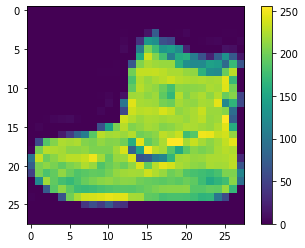

In [14]:
# Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# this shows that this image has pixel range of 255
# we need to scale these values to range from 0 to 1
# it is important that training set and testing set be processed in the same way

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

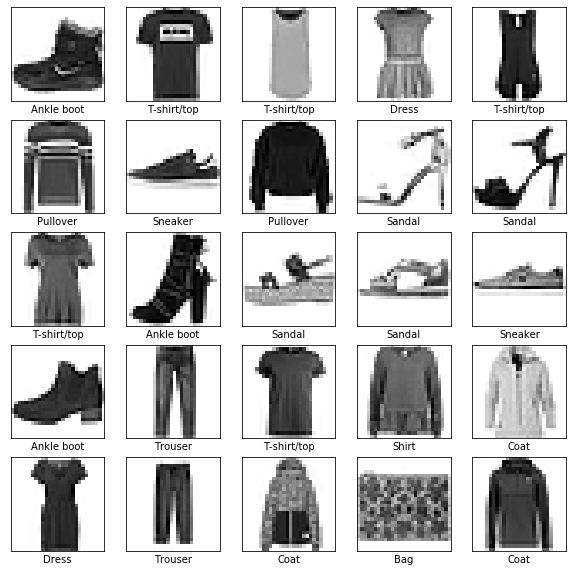

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
# Build the model
# uilding the neural network requires configuring the layers of the model, then compiling the model
# setup the layers
# Layers extract representations from the data fed into them. hopefully these
# representations are meaningful for the problem at hand

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# tf.keras.lyers.Flattern - transforms the format of the images from two-dimensional array(of 28 by 28 pixel)
# to one dimensional array 28 * 28
# firstdense layer has 128 connected nodes, the second returns a logits array withlength of 10
# each node contains a score that indicates the current image belongs to one of the 10 scores

# a few more settings are needed before the model is trained, they are added durin g model compile setup

# Loss function - measures how accurate the model is during training, we minimize this function to 
# steer the model in the right direction

# optimizer - this is how the model is updated based on the data it sees and its loss function

# metrics - used to monitor the trainig and testing steps

# compile the model
model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [22]:
# Train the model
# 1. Feed the training data tot he model
# 2. the model learns to associate images and labels
# 3. you ask the model to make predictions about a test set
# 4. verify that the predictions match the labels

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.5026 - acc: 0.8237
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3759 - acc: 0.8651
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3364 - acc: 0.8779
Epoch 4/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3140 - acc: 0.8856
Epoch 5/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2959 - acc: 0.8913
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2809 - acc: 0.8963
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2690 - acc: 0.9008
Epoch 8/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2583 - acc: 0.9049
Epoch 9/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2485 - acc: 0.9072
Epoch 10/10
60000/60000 [==============================] - 2s 31us/sample - loss: 

In [23]:
# evaluate the accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:,', test_acc)

10000/10000 - 0s - loss: 0.3392 - acc: 0.8804

Test Accuracy:, 0.8804


In [24]:
# It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

In [26]:
# make prdictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [28]:
predictions[0]

array([2.4352242e-10, 8.8236385e-10, 1.5260782e-12, 3.6146858e-10,
       5.3355469e-15, 2.4406245e-05, 1.2456178e-08, 2.0345978e-03,
       8.1461664e-09, 9.9794096e-01], dtype=float32)

In [29]:
# A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:
np.argmax(predictions[0])

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

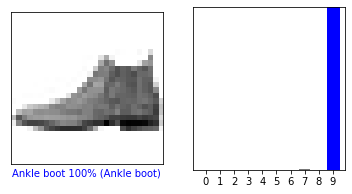

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

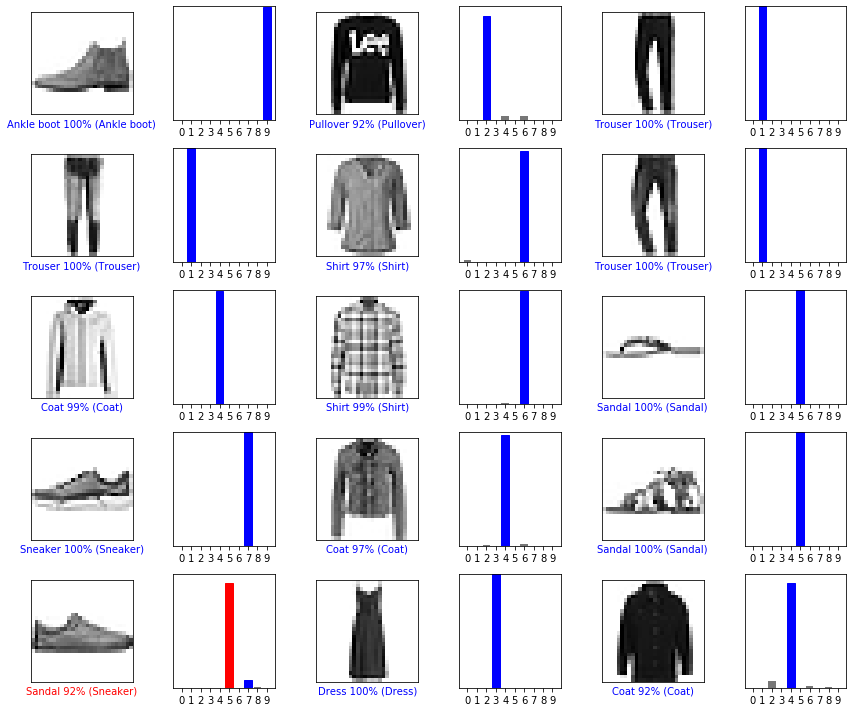

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
# use the trained model

img = test_images[1]
print(img.shape)

(28, 28)


In [34]:
img = (np.expand_dims(img, 0))

In [35]:
print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = probability_model.predict(img)

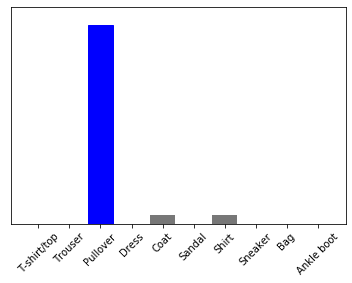

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [42]:
np.argmax(predictions_single[0])

2